In [7]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from scipy.stats import ttest_ind, `,ttest_ind_from_stats,norm

from statsmodels.distributions.empirical_distribution import ECDF

In [3]:
ttest_ind_from_stats(2.87,1.08,150,2.56,1.28,200,alternative='greater')

Ttest_indResult(statistic=2.3947738234213953, pvalue=0.008579470194694676)

In [6]:
ttest_ind_from_stats(243.5,229.5,50,300,229.5,50,alternative='greater')

Ttest_indResult(statistic=-1.2309368191721133, pvalue=0.8893537022294384)

In [18]:
1-norm.cdf(4.71)

1.2385839573969548e-06

### Two drug recovery test

In [9]:
d1 = pd.read_csv("drug_1_recovery.csv")
print("Mean: ", d1.mean())

Mean:  drug_1    7.104917
dtype: float64


In [10]:
d2 = pd.read_csv("drug_2_recovery.csv")
print("Mean: ", d2.mean())

Mean:  drug_2    8.073423
dtype: float64


In [15]:
## H0: u1 = u2
## Ha: u1 < u2
alpha = 0.01
test_stat, p_value = ttest_ind(d1, d2, alternative="less") # left-tailed test
print("Test stat: ", test_stat)
print("p-value: ", p_value)

if p_value[0] < alpha:
    print("Null rejected")

Test stat:  [-5.32112438]
p-value:  [1.27713574e-07]
Null rejected


In [16]:
## H0: u1 = u2
## Ha: u1 != u2
alpha = 0.01
test_stat, p_value = ttest_ind(d1, d2) # 2-tailed test
print("Test stat: ", test_stat)
print("p-value: ", p_value)

if p_value[0] < alpha:
    print("Null rejected")

Test stat:  [-5.32112438]
p-value:  [2.55427147e-07]
Null rejected


In [17]:
## H0: u1 = u2
## Ha: u1 != u2
alpha = 0.01
test_stat, p_value = ttest_ind(d1, d2, alternative="greater") # right-tailed test
print("Test stat: ", test_stat)
print("p-value: ", p_value)

if p_value[0] < alpha:
    print("Null rejected")

Test stat:  [-5.32112438]
p-value:  [0.99999987]


### Sachin Tendulkar Batting Data Analysis

In [26]:
df = pd.read_csv("Sachin_ODI.csv")
df

,runs,NotOut,mins,bf,fours,sixes,sr,Inns,Opp,Ground,Date,Winner,Won,century
0,13,0,30,15,3,0,86.66,1,New Zealand,Napier,1995-02-16,New Zealand,False,False
1,37,0,75,51,3,1,72.54,2,South Africa,Hamilton,1995-02-18,South Africa,False,False
2,47,0,65,40,7,0,117.50,2,Australia,Dunedin,1995-02-22,India,True,False
3,48,0,37,30,9,1,160.00,2,Bangladesh,Sharjah,1995-04-05,India,True,False
4,4,0,13,9,1,0,44.44,2,Pakistan,Sharjah,1995-04-07,Pakistan,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
355,14,0,34,15,2,0,93.33,2,Australia,Sydney,2012-02-26,Australia,False,False
356,39,0,45,30,5,0,130.00,2,Sri Lanka,Hobart,2012-02-28,India,True,False
357,6,0,25,19,1,0,31.57,1,Sri Lanka,Dhaka,2012-03-13,India,True,False
358,114,0,205,147,12,1,77.55,1,Bangladesh,Dhaka,2012-03-16,Bangladesh,False,True


### First innings vs. Second innings

In [27]:
df.groupby(["Inns"])["runs"].mean()

Inns
1    46.670588
2    40.173684
Name: runs, dtype: float64

In [37]:
d1 = df[df["Inns"]==1]["runs"]
d2 = df[df["Inns"]==2]["runs"]

## We saw last class that p-value for 1-sample test was not < 0.05
test_stat, p_value = ttest_ind(d1, d2) # two-tailed test
print("Test stat: ", test_stat)
print("p-value: ", p_value)

if p_value < alpha:
    print("Null rejected")

Test stat:  1.4612016295532178
p-value:  0.14483724194759964


In [44]:
e1 = ECDF(d1)
e2 = ECDF(d2)

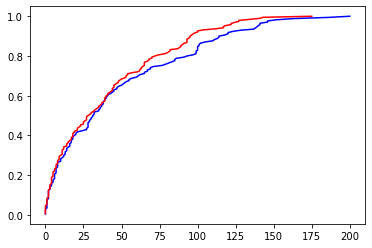

In [47]:
plt.figure()
plt.plot(e1.x, e1.y, c='b')
plt.plot(e2.x, e2.y, c='r')

In [59]:
kstest(d1, d2)

KstestResult(statistic=0.10990712074303406, pvalue=0.2086874783173226)

### Runs when India won vs. lost

In [61]:
df_won = df[df["Won"]==True]["runs"]
df_lost = df[df["Won"]==False]["runs"]

In [62]:
e1 = ECDF(df_won)
e2 = ECDF(df_lost)

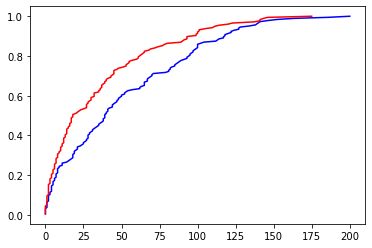

In [63]:
plt.figure()
plt.plot(e1.x, e1.y, c='b')
plt.plot(e2.x, e2.y, c='r')

In [64]:
kstest(df_won, df_lost)

KstestResult(statistic=0.20602766798418973, pvalue=0.0007769531141107455)

## Youtube 2-ads example

In [67]:
youtube_data = pd.read_csv("youtube.csv")
youtube_data.sample(100)

## Here, control - 1 ad
## treatment - 2 ads

,date,customer_id,premium,watch_time_hrs,customer_segmnt
6014,2018-10-13,760,0,2.293333,treatment
11950,2018-06-04,440,0,1.032188,control
5117,2018-11-04,410,0,0.810031,control
5300,2018-08-07,82,0,3.317615,control
12746,2018-10-22,589,0,0.966387,treatment
...,...,...,...,...,...
9543,2018-09-25,370,0,2.567534,control
16333,2018-07-10,859,0,1.215803,treatment
4370,2018-07-25,552,0,2.005096,treatment
6976,2018-09-22,329,0,0.595806,control


In [68]:
youtube_data.shape

(20000, 5)

In [69]:
youtube_data['customer_segmnt'].value_counts()

control      10000
treatment    10000
Name: customer_segmnt, dtype: int64

In [70]:
youtube_data.describe()

,customer_id,premium,watch_time_hrs
count,20000.000000,20000.000000,20000.000000
mean,499.001650,0.176750,9.362542
std,288.223444,0.381467,244.884839
min,0.000000,0.000000,0.160268
25%,249.000000,0.000000,1.678066
50%,500.000000,0.000000,2.670953
75%,747.000000,0.000000,4.204673
max,999.000000,1.000000,10007.648185


In [71]:
youtube_data["watch_time_hrs"].quantile(0.998)

21.356607722117484

In [72]:
# Outlier
q998 = youtube_data["watch_time_hrs"].quantile(0.998)
youtube_data_no_out = youtube_data[youtube_data["watch_time_hrs"] < q998]

In [73]:
youtube_data_no_out.describe()

,customer_id,premium,watch_time_hrs
count,19960.000000,19960.000000,19960.000000
mean,499.160271,0.176653,3.331932
std,288.249181,0.381385,2.474943
min,0.000000,0.000000,0.160268
25%,249.000000,0.000000,1.676373
50%,501.000000,0.000000,2.664286
75%,747.000000,0.000000,4.186733
max,999.000000,1.000000,21.356119


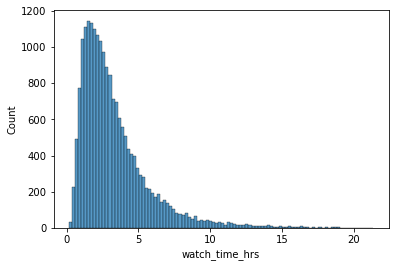

In [74]:
sns.histplot(youtube_data_no_out['watch_time_hrs'], bins=100)
plt.show()

In [75]:
control_data = youtube_data_no_out[youtube_data_no_out["customer_segmnt"] == "control"]
treatment_data = youtube_data_no_out[youtube_data_no_out["customer_segmnt"] == "treatment"]

In [76]:
control_data["watch_time_hrs"].mean()

3.6099602285795642

In [77]:
treatment_data["watch_time_hrs"].mean()

3.054293679735035

In [79]:
## u1 - 3.6, u2 - 3.0, u1>u2
tstat, p = ttest_ind(control_data["watch_time_hrs"], treatment_data["watch_time_hrs"], alternative="greater")
print(p)

2.719204293115659e-57


### Manually computing the 2-sided ttest

In [80]:
d1 = pd.read_csv("drug_1_recovery.csv")
print("Mean: ", d1.mean())

Mean:  drug_1    7.104917
dtype: float64


In [81]:
d2 = pd.read_csv("drug_2_recovery.csv")
print("Mean: ", d2.mean())

Mean:  drug_2    8.073423
dtype: float64


In [82]:
## H0: u1 = u2
## Ha: u1 != u2
alpha = 0.01
test_stat, p_value = ttest_ind(d1, d2) # 2-tailed test
print("Test stat: ", test_stat)
print("p-value: ", p_value)

if p_value[0] < alpha:
    print("Null rejected")

Test stat:  [-5.32112438]
p-value:  [2.55427147e-07]
Null rejected


In [104]:
t_stat = (d1["drug_1"].mean() - d2["drug_2"].mean()) / np.sqrt( (d1["drug_1"].var()/ (len(d1) - 1) ) + (d2["drug_2"].var() / (len(d2) - 1) ) )

In [105]:
t_stat

-5.4609597826397005

In [92]:
pooled.std()

0    1.425612
dtype: float64

In [93]:
len(pooled)

220